In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [2]:
# Load Yolo
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNet("crop_weed_final.weights", "crop_weed.cfg")
print("[INFO] YOLO loaded successfully !")
classes = []
with open("obj.names", "r") as f:
     classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

[INFO] loading YOLO from disk...
[INFO] YOLO loaded successfully !


In [3]:
def detect(img, N):
    # Loading image
    img = cv2.imread(img)
    #img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape
    
    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (512, 512), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    start = time.time()
    outs = net.forward(output_layers)
    end = time.time()

    #show timing information on YOLO
    print("[INFO] YOLO took {:.6f} seconds".format(end - start))
    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label+" "+confidence, (x, y-5), font, 0.5, color, 2)

    det = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,8))
    plt.axis('off')
    plt.imshow(det)
    
    #save detected image 
    path = 'output_'+str(N)+'.jpeg'
    det = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    cv2.imwrite(path,det)
    
    return plt


[INFO] YOLO took 1.366349 seconds


<module 'matplotlib.pyplot' from 'C:\\Users\\Asus\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

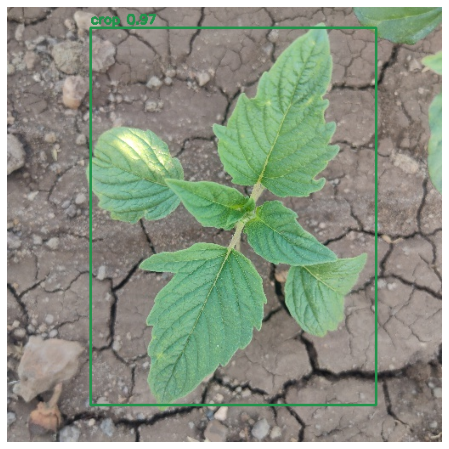

In [4]:
detect('crop_1.jpeg',1)

[INFO] YOLO took 0.604384 seconds


<module 'matplotlib.pyplot' from 'C:\\Users\\Asus\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

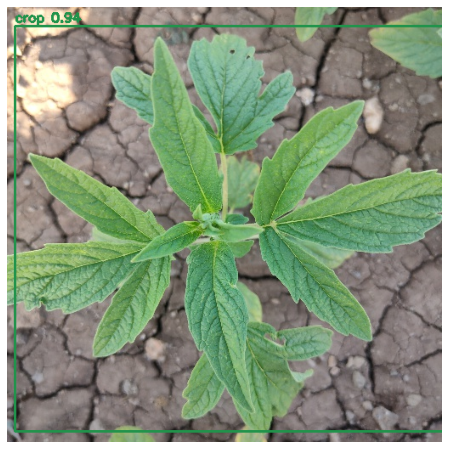

In [5]:
detect("crop_2.jpeg",2)

[INFO] YOLO took 0.886629 seconds


<module 'matplotlib.pyplot' from 'C:\\Users\\Asus\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

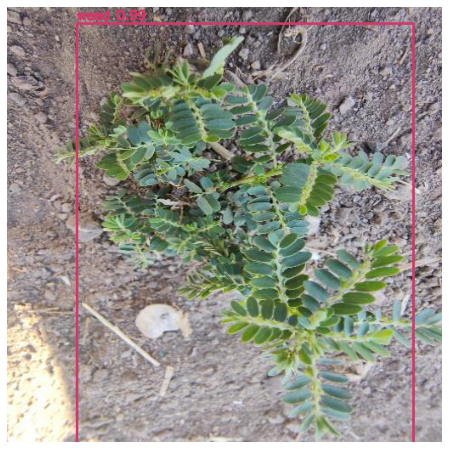

In [6]:
detect('weed_1.jpeg',3)

[INFO] YOLO took 0.925526 seconds


<module 'matplotlib.pyplot' from 'C:\\Users\\Asus\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

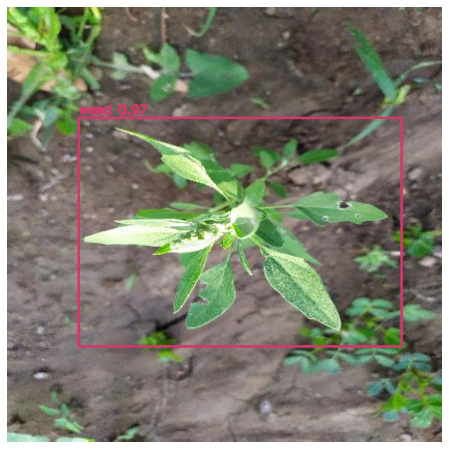

In [7]:
detect('weed_2.jpeg',4)